<a href="https://colab.research.google.com/github/LintangAprillya/PCVK_SMT5/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAPORAN PCVK - MODUL 3**





---


Nama  : Lintang Aprillya Sari

Kelas : 3C

Absen : 13

NIM   : 2241720231


---



## **PRAKTIKUM**

###1. Buka https://colab.research.google.com/, pilih tab Github dan pastikan repository yang terpilih ada repository yang sama dengan praktikum pada minggu pertama dan kedua.


Lanjutkan dengan membuat notebook baru dan ubah nama file menjadi “Week3.ipynb”.
Perhatian: Jangan lupa untuk menyimpan salinan ke Github setelah melakukan
perubahan / ketika Anda sudah selesai melakukan praktikum.

###2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ikuti alur autorisasinya hingga muncul pesan: “Mounted at /content/drive”.

###3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan transformasi linier brightness adalah sebagai berikut:

𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + *b*

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness. Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:

Mengubah tingkat kecerahan citra
-----------------------------
Masukkan nilai kecerahan: 50


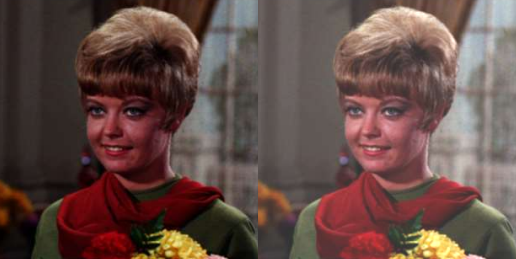

In [ ]:
import cv2 as cv  # Impor OpenCV
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('-----------------------------')

# Memperbaiki string path yang tidak tertutup
original = cv.imread("/content/drive/MyDrive/PCVK/tiff.png")

# Memastikan bahwa gambar berhasil di-load
if original is None:
    print("Error: Gambar tidak ditemukan.")
else:
    try:
        # Mengambil input kecerahan dari pengguna
        brightness = int(input('Masukkan nilai kecerahan: '))
    except ValueError:
        print('Error, not a number')
        brightness = 0  # Set default kecerahan jika input salah

    # Membuat gambar kosong dengan ukuran dan tipe data yang sama dengan gambar asli
    brightness_image = np.zeros(original.shape, original.dtype)

    # Mengakses tiap piksel dan menambahkan kecerahan
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Cara lebih sederhana tanpa loop, menggunakan convertScaleAbs
    brightness_image_simple = cv.convertScaleAbs(original, alpha=1, beta=brightness)

    # Menggabungkan gambar asli dan gambar yang diubah tingkat kecerahannya
    final_frame = cv.hconcat([original, brightness_image_simple])

    # Menampilkan gambar
    from google.colab.patches import cv2_imshow
    cv2_imshow(final_frame)


###**TUGAS PRAKTIKUM**

####1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


---



***Jawab :***

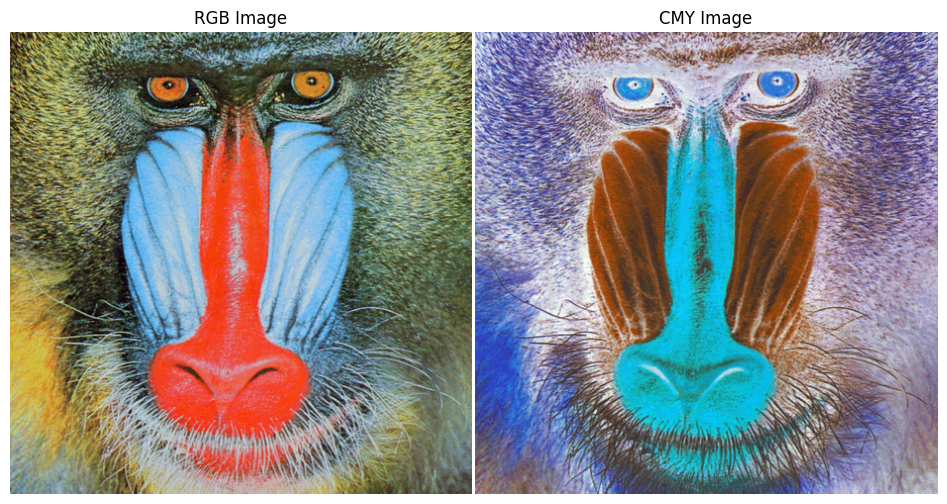

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_cmy(image_path):
    # Membaca gambar
    img = cv.imread(image_path)

    # Periksa apakah gambar berhasil dibaca
    if img is None:
        print("Gambar gagal dimuat.")
        return

    # Mengonversi gambar dari BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Normalisasi gambar ke rentang [0, 1]
    img_rgb_normalized = img_rgb / 255.0

    # Mengonversi RGB ke CMY
    C = 1 - img_rgb_normalized[:, :, 0]
    M = 1 - img_rgb_normalized[:, :, 1]
    Y = 1 - img_rgb_normalized[:, :, 2]

    # Menggabungkan CMY ke dalam satu gambar
    img_cmy = np.stack([C, M, Y], axis=-1)

    # Mengubah gambar CMY kembali ke rentang [0, 255] untuk tampilan
    img_cmy_display = (img_cmy * 255).astype(np.uint8)

    # Menampilkan gambar RGB dan CMY tanpa jarak
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0})

    axes[0].imshow(img_rgb)
    axes[0].set_title('RGB Image')
    axes[0].axis('off')

    axes[1].imshow(img_cmy_display)
    axes[1].set_title('CMY Image')
    axes[1].axis('off')

    plt.show()

# Path gambar
image_path = '/content/drive/MyDrive/PCVK/bekantan.png'
rgb_to_cmy(image_path)


####2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:
---



***Jawab :***

Mengubah Kontras dan Tingkat Kecerahan Citra
---------------------------------------------
Masukkan nilai kecerahan [-255 - 255] : 50
Masukkan faktor kontras [1.0 - 3.0]   : 2


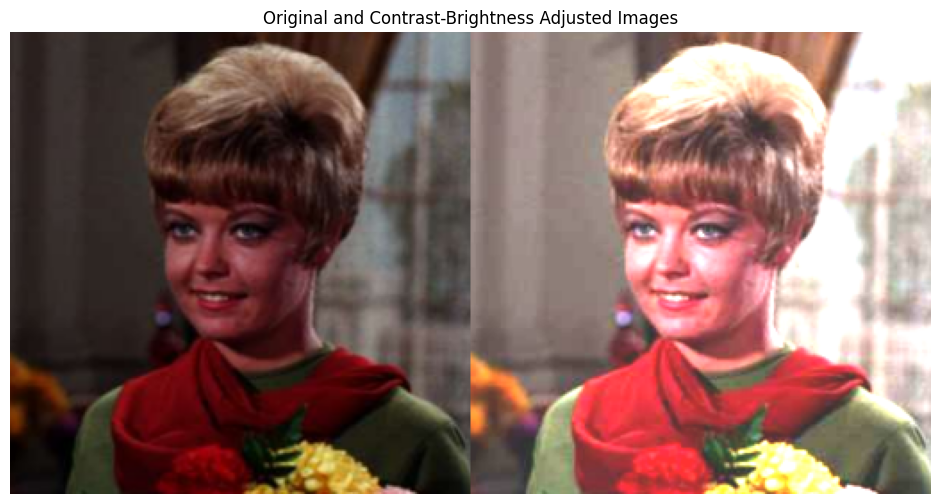

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def adjust_contrast_brightness(image_path, contrast, brightness):
    # Membaca gambar
    original = cv.imread(image_path)

    # Memastikan bahwa gambar berhasil di-load
    if original is None:
        print("Error: Gambar tidak ditemukan.")
        return

    # Mengonversi gambar dari BGR ke RGB untuk tampilan
    original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

    # Menggunakan convertScaleAbs untuk mengubah kontras dan kecerahan
    contrast_brightness_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

    # Menggabungkan gambar asli dan gambar yang diubah kontrasnya
    final_frame = cv.hconcat([original_rgb, cv.cvtColor(contrast_brightness_image, cv.COLOR_BGR2RGB)])

    # Menampilkan gambar
    plt.figure(figsize=(12, 6))
    plt.imshow(final_frame)
    plt.title('Original and Contrast-Brightness Adjusted Images')
    plt.axis('off')
    plt.show()

# Path gambar
image_path = '/content/drive/MyDrive/PCVK/tiff.png'

# Input dari pengguna
print('Mengubah Kontras dan Tingkat Kecerahan Citra')
print('---------------------------------------------')
brightness = int(input('Masukkan nilai kecerahan [-255 - 255] : '))
contrast = float(input('Masukkan faktor kontras [1.0 - 3.0]   : '))

# Panggil fungsi
adjust_contrast_brightness(image_path, contrast, brightness)


####3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:
---



***Jawab :***

Mengubah tingkat kecerahan citra dengan Transformasi Logarithmic
-----------------------------------------------------------------

Masukkan nilai kecerahan (contoh: 10 untuk terang): 50


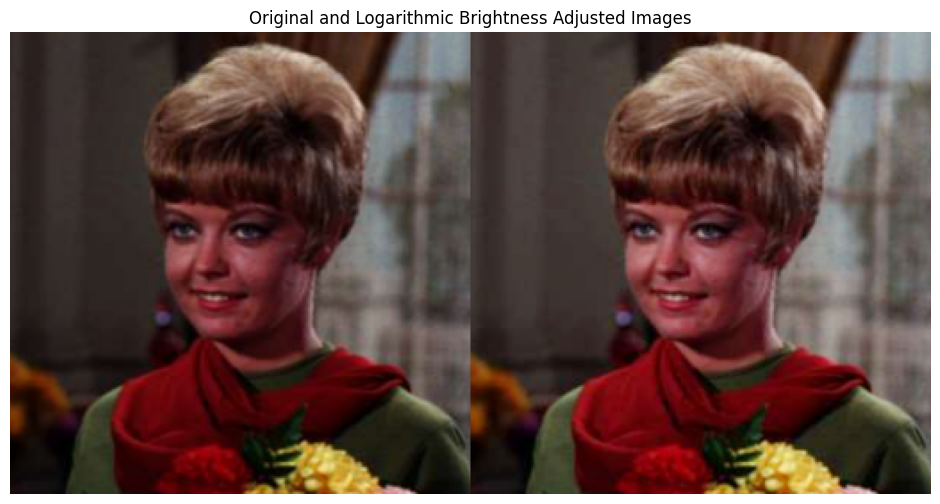

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def logarithmic_brightness(image_path, c):
    # Membaca gambar
    original = cv.imread(image_path)

    # Memastikan bahwa gambar berhasil di-load
    if original is None:
        print("Error: Gambar tidak ditemukan.")
        return

    # Mengonversi gambar dari BGR ke RGB
    original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

    # Normalisasi gambar ke rentang [0, 1]
    original_norm = original_rgb / 255.0

    # Membuat array kosong untuk gambar yang ditransformasikan
    log_transformed = np.zeros_like(original_rgb, dtype=np.float32)

    # Mengaplikasikan transformasi logaritmik pada setiap channel
    for i in range(3):  # Ada 3 channel: R, G, B
        log_transformed[:, :, i] = c * np.log1p(original_norm[:, :, i])

    # Mengubah kembali ke rentang [0, 255]
    log_transformed = np.clip(log_transformed * 255 / np.max(log_transformed), 0, 255).astype(np.uint8)

    # Menggabungkan gambar asli dan gambar yang ditransformasikan
    final_frame = cv.hconcat([original_rgb, log_transformed])

    # Menampilkan gambar
    plt.figure(figsize=(12, 6))
    plt.imshow(final_frame)
    plt.title('Original and Logarithmic Brightness Adjusted Images')
    plt.axis('off')
    plt.show()

# Path gambar
image_path = '/content/drive/MyDrive/PCVK/tiff.png'

# Input dari pengguna untuk konstanta skala
print('Mengubah tingkat kecerahan citra dengan Transformasi Logarithmic')
print('-----------------------------------------------------------------')
print('')

# Masukkan nilai kecerahan (c) dalam rentang yang sesuai
c = float(input('Masukkan nilai kecerahan (contoh: 10 untuk terang): '))

# Panggil fungsi
logarithmic_brightness(image_path, c)


####4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
---



***Jawab :***

a. Averaging

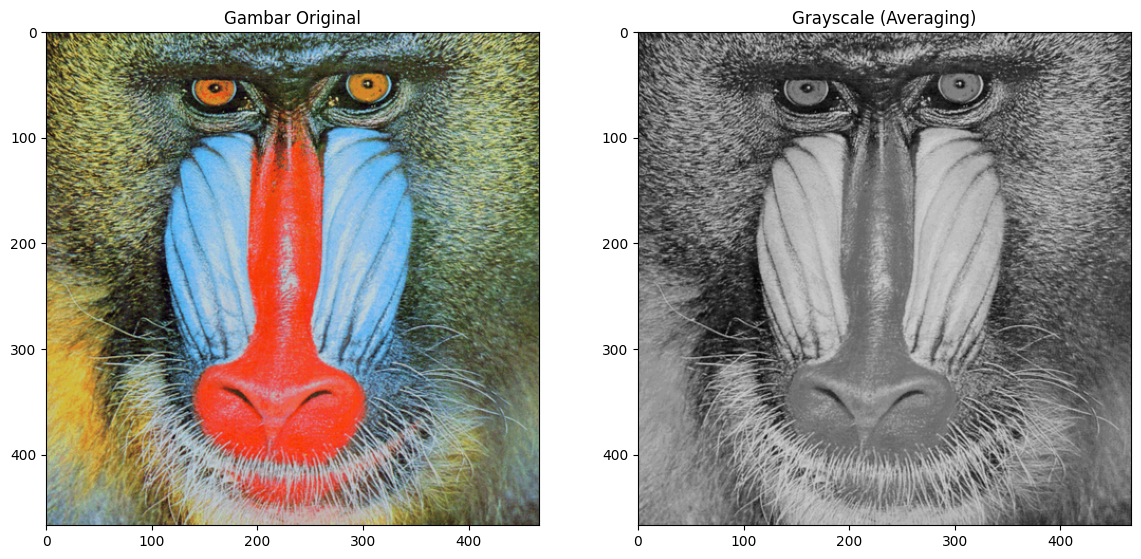

In [17]:
# Importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/PCVK/bekantan.png'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate grayscale image using averaging method
def grayscale_averaging(img):
    return np.mean(img, axis=2, dtype=int)

# Get the grayscale image
grayscale_image = grayscale_averaging(image_rgb)

# Convert grayscale image to RGB format to display it with matplotlib
grayscale_image_rgb = np.stack([grayscale_image]*3, axis=-1)

# Create a figure with custom size
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Function to add custom rulers
def add_ruler(ax, image_shape):
    tick_values = [0, 100, 200, 300, 400, 500]
    max_x = min(image_shape[1], tick_values[-1])
    max_y = min(image_shape[0], tick_values[-1])

    ax.set_xticks(tick_values)
    ax.set_xticklabels(tick_values)
    ax.set_yticks(tick_values)
    ax.set_yticklabels(tick_values)

    ax.set_xlim(0, max_x)
    ax.set_ylim(max_y, 0)  # Invert y-axis to match image orientation

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title('Gambar Original')
ax[0].axis('on')
add_ruler(ax[0], image_rgb.shape)

# Display the grayscale image
ax[1].imshow(grayscale_image_rgb)
ax[1].set_title('Grayscale (Averaging)')
ax[1].axis('on')
add_ruler(ax[1], grayscale_image_rgb.shape)

plt.show()


b. Lightness

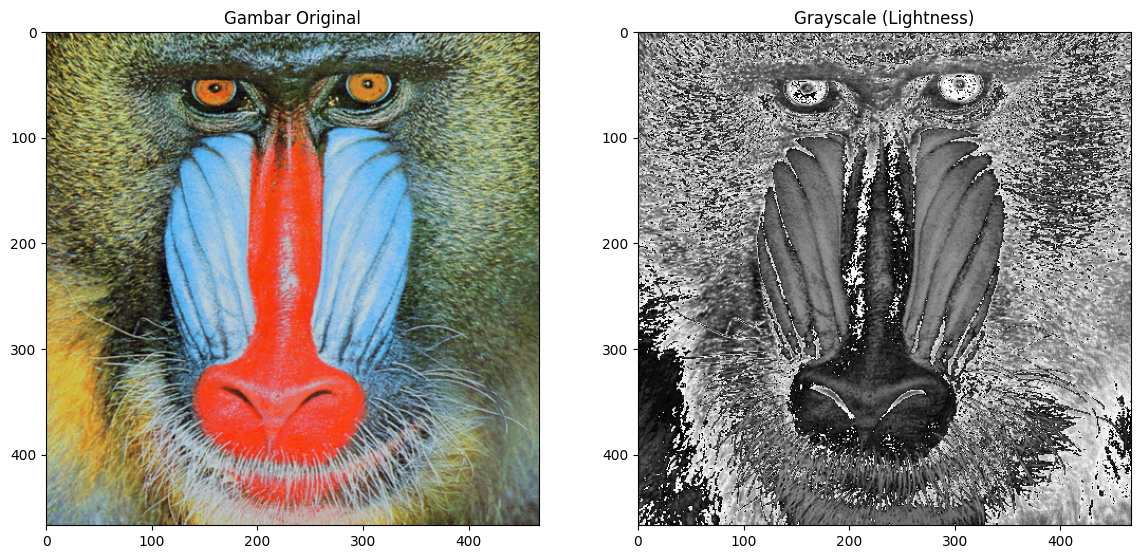

In [24]:
# Importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/PCVK/bekantan.png'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate grayscale image using lightness method
def grayscale_lightness(img):
    # Compute grayscale using lightness method
    max_rgb = np.max(img, axis=2)
    min_rgb = np.min(img, axis=2)
    gray = (max_rgb + min_rgb) / 2
    return gray

# Get the grayscale image
grayscale_image_lightness = grayscale_lightness(image_rgb)

# Normalize grayscale image to range [0, 255]
grayscale_image_lightness = cv2.normalize(grayscale_image_lightness, None, 0, 255, cv2.NORM_MINMAX)

# Convert grayscale image to RGB format to display it with matplotlib
grayscale_image_lightness_rgb = np.stack([grayscale_image_lightness]*3, axis=-1).astype(np.uint8)

# Create a figure with custom size
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Function to add custom rulers
def add_ruler(ax, image_shape):
    tick_values = [0, 100, 200, 300, 400, 500]
    max_x = min(image_shape[1], tick_values[-1])
    max_y = min(image_shape[0], tick_values[-1])

    ax.set_xticks(tick_values)
    ax.set_xticklabels(tick_values)
    ax.set_yticks(tick_values)
    ax.set_yticklabels(tick_values)

    ax.set_xlim(0, max_x)
    ax.set_ylim(max_y, 0)  # Invert y-axis to match image orientation

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title('Gambar Original')
ax[0].axis('on')
add_ruler(ax[0], image_rgb.shape)

# Display the grayscale image using lightness
ax[1].imshow(grayscale_image_lightness_rgb)
ax[1].set_title('Grayscale (Lightness)')
ax[1].axis('on')
add_ruler(ax[1], grayscale_image_lightness_rgb.shape)

plt.show()


c. Luminance

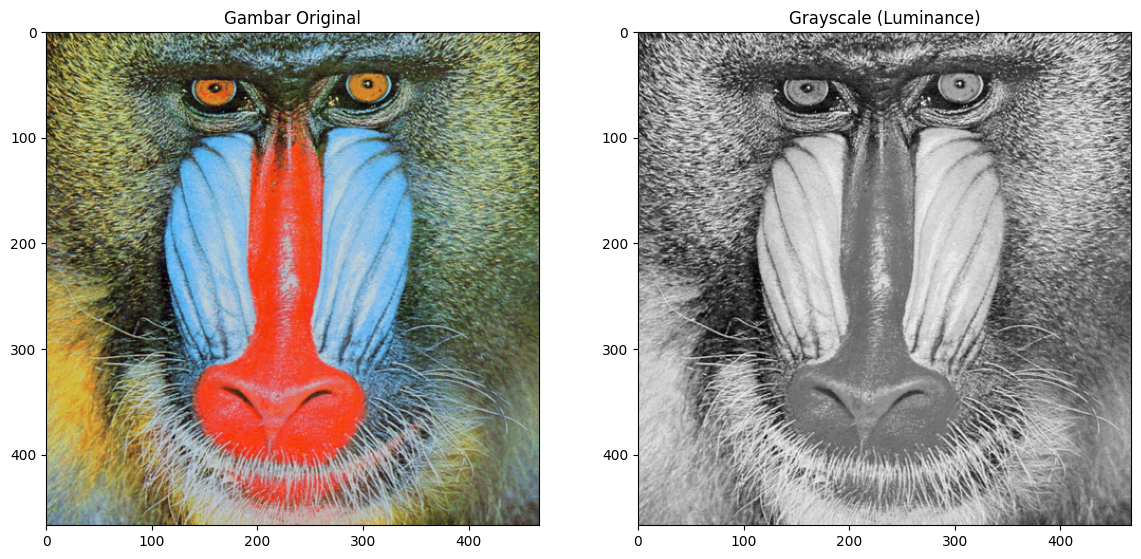

In [26]:
# Importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/PCVK/bekantan.png'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate grayscale image using luminance method
def grayscale_luminance(img):
    # Compute grayscale using luminance method
    return 0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]

# Get the grayscale image
grayscale_image_luminance = grayscale_luminance(image_rgb)

# Normalize grayscale image to range [0, 255]
grayscale_image_luminance = cv2.normalize(grayscale_image_luminance, None, 0, 255, cv2.NORM_MINMAX)

# Convert grayscale image to RGB format to display it with matplotlib
grayscale_image_luminance_rgb = np.stack([grayscale_image_luminance]*3, axis=-1).astype(np.uint8)

# Create a figure with custom size
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Function to add custom rulers
def add_ruler(ax, image_shape):
    tick_values = [0, 100, 200, 300, 400, 500]
    max_x = min(image_shape[1], tick_values[-1])
    max_y = min(image_shape[0], tick_values[-1])

    ax.set_xticks(tick_values)
    ax.set_xticklabels(tick_values)
    ax.set_yticks(tick_values)
    ax.set_yticklabels(tick_values)

    ax.set_xlim(0, max_x)
    ax.set_ylim(max_y, 0)  # Invert y-axis to match image orientation

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title('Gambar Original')
ax[0].axis('on')
add_ruler(ax[0], image_rgb.shape)

# Display the grayscale image using luminance
ax[1].imshow(grayscale_image_luminance_rgb)
ax[1].set_title('Grayscale (Luminance)')
ax[1].axis('on')
add_ruler(ax[1], grayscale_image_luminance_rgb.shape)

plt.show()


####5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

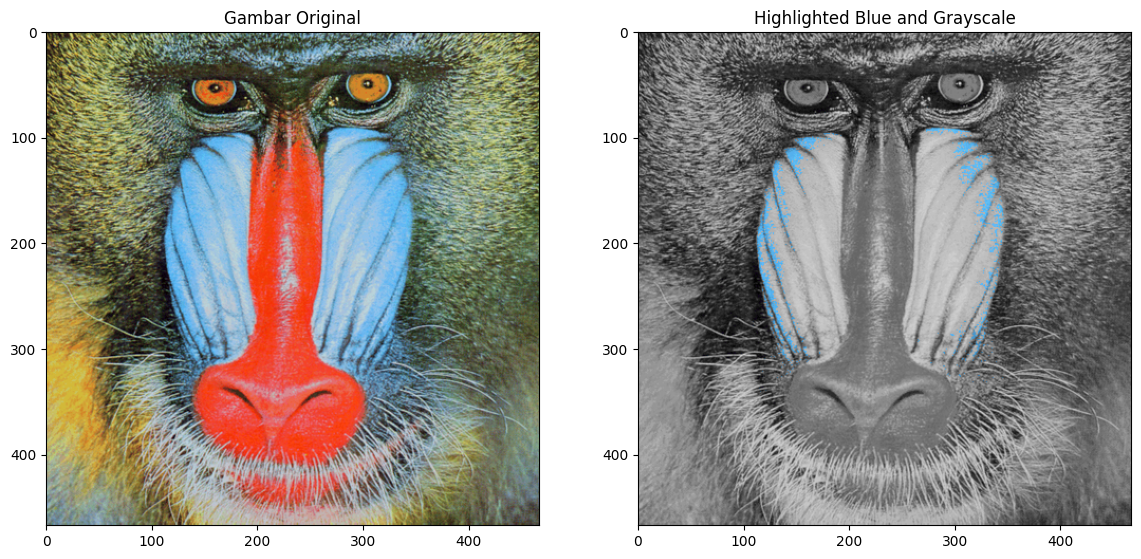

In [29]:
# Importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/PCVK/bekantan.png'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate grayscale image using averaging method
def grayscale_averaging(img):
    return np.mean(img, axis=2, dtype=int)

# Create a mask for the blue color
def create_blue_mask(img):
    # Define the lower and upper bounds for the blue color in RGB
    lower_blue = np.array([0, 0, 100], dtype=np.uint8)
    upper_blue = np.array([100, 100, 255], dtype=np.uint8)

    # Convert the image to HSV (Hue, Saturation, Value) to create a more accurate mask
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_blue_hsv = np.array([100, 150, 0], dtype=np.uint8)
    upper_blue_hsv = np.array([140, 255, 255], dtype=np.uint8)

    # Create the mask
    mask = cv2.inRange(img_hsv, lower_blue_hsv, upper_blue_hsv)
    return mask

# Apply the blue mask to keep only blue colors
def apply_blue_mask(img, mask):
    blue_img = cv2.bitwise_and(img, img, mask=mask)
    return blue_img

# Create the blue mask
blue_mask = create_blue_mask(image_rgb)

# Apply the blue mask to keep only blue colors
blue_img = apply_blue_mask(image_rgb, blue_mask)

# Convert the original image to grayscale
grayscale_image = grayscale_averaging(image_rgb)

# Convert grayscale image to RGB format
grayscale_image_rgb = np.stack([grayscale_image]*3, axis=-1).astype(np.uint8)

# Combine blue image with grayscale image
combined_image = np.where(blue_mask[..., None].astype(bool), image_rgb, grayscale_image_rgb)

# Create a figure with custom size
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Function to add custom rulers
def add_ruler(ax, image_shape):
    tick_values = [0, 100, 200, 300, 400, 500]
    max_x = min(image_shape[1], tick_values[-1])
    max_y = min(image_shape[0], tick_values[-1])

    ax.set_xticks(tick_values)
    ax.set_xticklabels(tick_values)
    ax.set_yticks(tick_values)
    ax.set_yticklabels(tick_values)

    ax.set_xlim(0, max_x)
    ax.set_ylim(max_y, 0)  # Invert y-axis to match image orientation

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title('Gambar Original')
ax[0].axis('on')
add_ruler(ax[0], image_rgb.shape)

# Display the combined image
ax[1].imshow(combined_image)
ax[1].set_title('Highlighted Blue and Grayscale')
ax[1].axis('on')
add_ruler(ax[1], combined_image.shape)

plt.show()


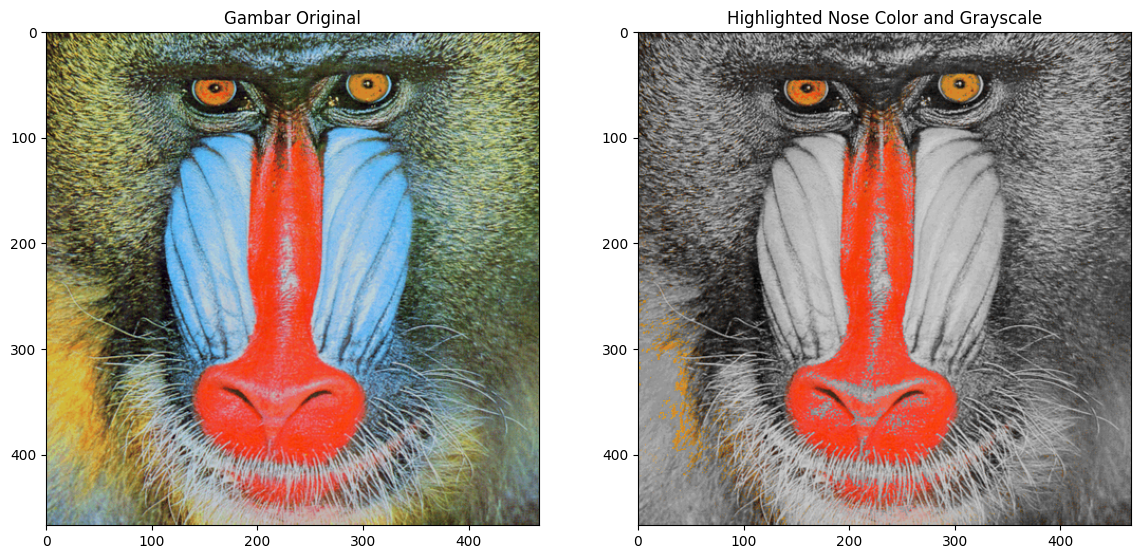

In [30]:
# Importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/PCVK/bekantan.png'
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to create a mask for the nose color
def create_nose_mask(img):
    # Convert the image to HSV (Hue, Saturation, Value) for better color segmentation
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Define the range for the nose color in HSV
    # These values might need adjustment depending on the actual color of the nose in the image
    lower_nose_color = np.array([0, 20, 20], dtype=np.uint8)  # Example lower bound
    upper_nose_color = np.array([20, 255, 255], dtype=np.uint8)  # Example upper bound

    # Create the mask for the nose color
    mask = cv2.inRange(img_hsv, lower_nose_color, upper_nose_color)
    return mask

# Apply the nose mask to keep only nose colors
def apply_nose_mask(img, mask):
    nose_img = cv2.bitwise_and(img, img, mask=mask)
    return nose_img

# Create the nose mask
nose_mask = create_nose_mask(image_rgb)

# Apply the nose mask to keep only nose colors
nose_img = apply_nose_mask(image_rgb, nose_mask)

# Convert the original image to grayscale
def grayscale_averaging(img):
    return np.mean(img, axis=2, dtype=int)

grayscale_image = grayscale_averaging(image_rgb)

# Convert grayscale image to RGB format
grayscale_image_rgb = np.stack([grayscale_image]*3, axis=-1).astype(np.uint8)

# Combine nose image with grayscale image
combined_image = np.where(nose_mask[..., None].astype(bool), image_rgb, grayscale_image_rgb)

# Create a figure with custom size
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Function to add custom rulers
def add_ruler(ax, image_shape):
    tick_values = [0, 100, 200, 300, 400, 500]
    max_x = min(image_shape[1], tick_values[-1])
    max_y = min(image_shape[0], tick_values[-1])

    ax.set_xticks(tick_values)
    ax.set_xticklabels(tick_values)
    ax.set_yticks(tick_values)
    ax.set_yticklabels(tick_values)

    ax.set_xlim(0, max_x)
    ax.set_ylim(max_y, 0)  # Invert y-axis to match image orientation

# Display the original image
ax[0].imshow(image_rgb)
ax[0].set_title('Gambar Original')
ax[0].axis('on')
add_ruler(ax[0], image_rgb.shape)

# Display the combined image
ax[1].imshow(combined_image)
ax[1].set_title('Highlighted Nose Color and Grayscale')
ax[1].axis('on')
add_ruler(ax[1], combined_image.shape)

plt.show()
